Darts Library - Time Series

In [1]:
#Loading the package
import darts
import darts.models
from darts.models import ExponentialSmoothing
from darts.models import AutoARIMA
from darts.models import ARIMA
from darts.models import VARIMA
from darts.models import EnsembleModel
from darts.models import RegressionEnsembleModel
from darts.models import RandomForest
from darts.models import XGBModel
from darts.models import Theta
from darts.models import LightGBMModel
from darts.models import LinearRegressionModel
from darts.models import Prophet
from darts.models import CatBoostModel
from darts.models import StatsForecastETS
from darts.metrics import mae
from darts.metrics import rmsle
from darts.models import BATS
from darts.models import TBATS
from darts import metrics
from darts import TimeSeries
from sklearn.metrics import mean_squared_log_error
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import sanitize_sequence
from matplotlib._api import MatplotlibDeprecationWarning
import warnings
warnings.filterwarnings("ignore")

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).


In [4]:
#Load Data
data = pd.read_csv('AirPassengers.csv')
series = TimeSeries.from_dataframe(data, 'Date', 'Passengers')

series.head()

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1949-01-01 1949-02-01 ... 1949-05-01
  * component  (component) object 'Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [5]:
data.tail()

,Date,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
# Train Test Split - 75% / 25%
train, test = series[:-36], series[-36:]


In [7]:
#Split by date - User Defined ('Input_Date')
# Set aside the last 36 months as a validation series  - 75% / 25% split 
#train, test = series.split_before(pd.Timestamp('19580101'))

EXPONENTIAL SMOOTHING MODEL

In [8]:
#Define Exponential Smoothing and fit on training data
ESmodel = ExponentialSmoothing()
ESmodel.fit(train)
# Forecast
ESprediction = ESmodel.predict(len(test), num_samples=500)
#Calculates RMSLE score for model
ESrmsle = rmsle(test, ESprediction)
#Prints score
print('Expo Smoothing Model - RMSLE is %.6f' % (ESrmsle))

Expo Smoothing Model - RMSLE is 0.059294


Text(0, 0.5, 'Passengers')

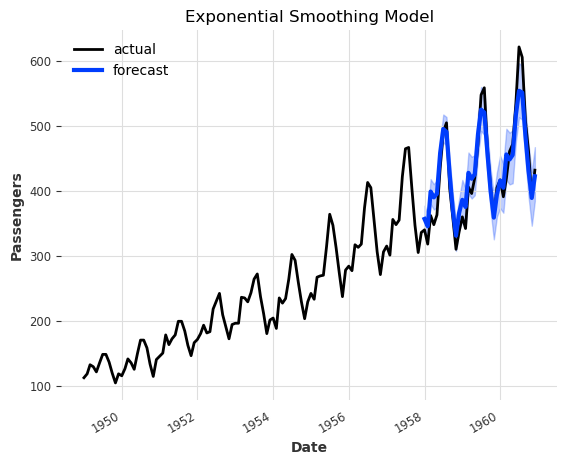

In [9]:
#Plot Expo Smoothing Actuals Vs Forecast
series.plot(label='actual')
ESprediction.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("Exponential Smoothing Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

AUTO ARIMA MODEL

In [10]:
#Define Auto ARIMA model and fit on training data
AAmodel = AutoARIMA()
AAmodel.fit(train)
#Forecast
AApreds = AAmodel.predict(len(test))
#Calculates RMSLE score for model
AArmsle = rmsle(test, AApreds)
#Prints score
#Prints score
print('AUTO ARIMA Model - RMSLE is %.6f' % (AArmsle))

AUTO ARIMA Model - RMSLE is 0.132712


Text(0, 0.5, 'Passengers')

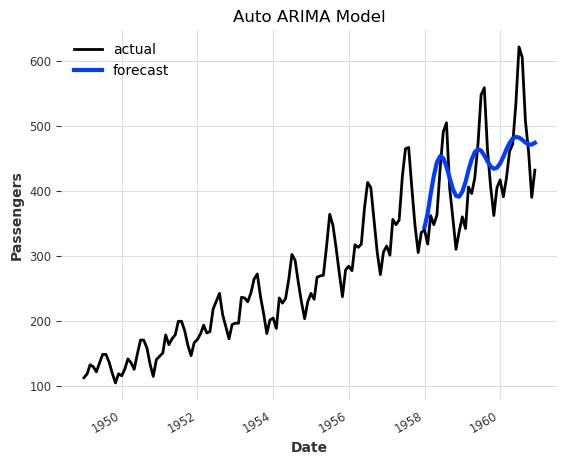

In [11]:
#Plot Auto ARIMA Actuals Vs Forecast
series.plot(label='actual')
AApreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("Auto ARIMA Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

PROPHET MODEL

In [12]:
#Defines Prophet model and fits on training data 
Pmodel = Prophet()
Pmodel.fit(train)
#Forecast
Ppreds = Pmodel.predict(len(test))
#Calculates RMSLE score for model
Prmsle = rmsle(test, Ppreds)
#Prints score
print('Prophet Model - RMSLE is %.6f' % (Prmsle))

14:48:46 - cmdstanpy - INFO - Chain [1] start processing
14:48:47 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model - RMSLE is 0.105279


Text(0, 0.5, 'Passengers')

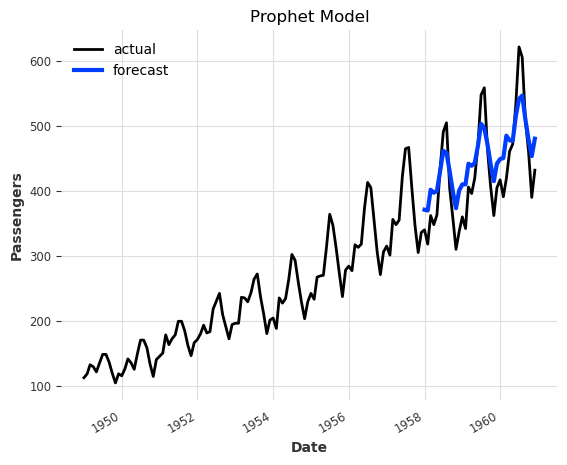

In [13]:
#Plot Auto ARIMA Actuals Vs Forecast
series.plot(label='actual')
Ppreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("Prophet Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

ARIMA MODEL

In [14]:
#Define Auto ARIMA model and fit on training data
Amodel = ARIMA()
Amodel.fit(train)
#Forecast
Apreds = Amodel.predict(len(test))
#Calculates RMSLE score for model
Armsle = rmsle(test, Apreds)
#Prints score
print('ARIMA Model - RMSLE is %.6f' % (Armsle))

ARIMA Model - RMSLE is 0.107703


Text(0, 0.5, 'Passengers')

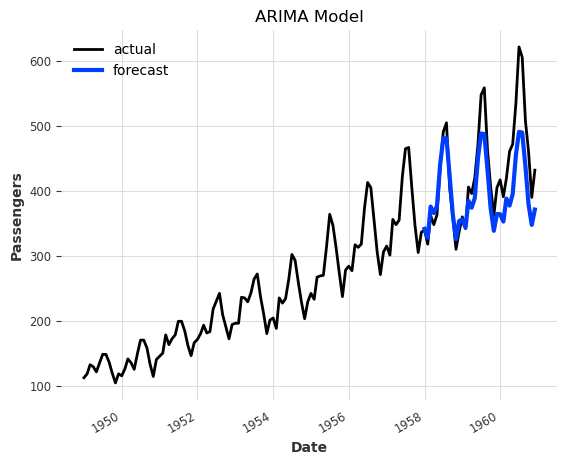

In [15]:
#Plot Auto ARIMA Actuals Vs Forecast
series.plot(label='actual')
Apreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("ARIMA Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

XGBOOST MODEL

In [16]:
#Define XGBoost model and fit on training data
XGB_model = XGBModel(lags=12, objective='reg:squarederror', n_estimators = 1000)
XGB_model.fit(train)
#Forecast
XGBpreds = XGB_model.predict(len(test))
#Calculates RMSLE score for model
XGBrmsle = rmsle(test, XGBpreds)
#Prints score
print('XGBoost Model - RMSLE is %.6f' % (XGBrmsle))

XGBoost Model - RMSLE is 0.126250


Text(0, 0.5, 'Passengers')

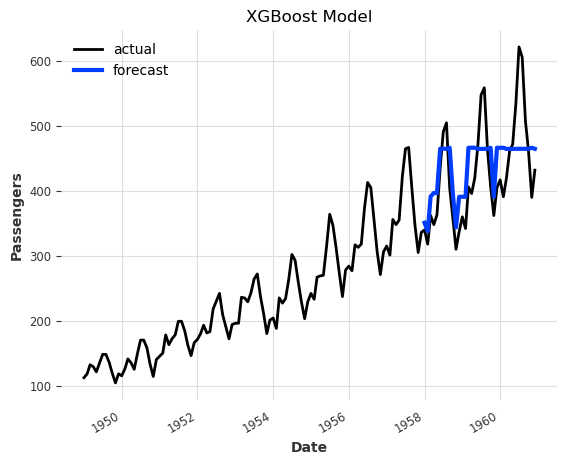

In [17]:
#Plot XGBoost Actuals Vs Forecast
series.plot(label='actual')
XGBpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("XGBoost Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

LINEAR REGRESSION MODEL

In [18]:
#Define Auto ARIMA model and fit on training data
LINRmodel = LinearRegressionModel(lags=12)
LINRmodel.fit(train)
#Forecast
LINRpreds = LINRmodel.predict(len(test))
#Calculates RMSLE score for model
LINRrmsle = rmsle(test, LINRpreds)
#Prints score
print('Linear Regression Model - RMSLE is %.6f' % (LINRrmsle))

Linear Regression Model - RMSLE is 0.109962


Text(0, 0.5, 'Passengers')

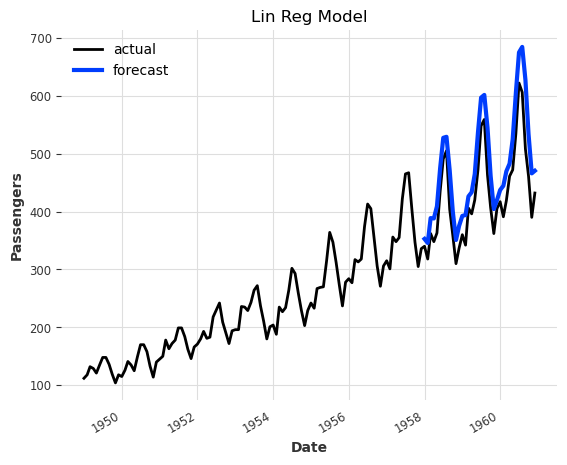

In [19]:
#Plot Lin Reg Actuals Vs Forecast
series.plot(label='actual')
LINRpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("Lin Reg Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

LIGHTGBM MODEL

In [20]:
#Define LightGBM model and fit on training data
LGBMmodel = LightGBMModel(lags=10, objective='regression')
LGBMmodel.fit(train)
#Forecast
LGBMpreds = LGBMmodel.predict(len(test))
#Calculates RMSLE score for model
LGBMrmsle = rmsle(test, LGBMpreds)
#Prints score
print('LightGBM Model - RMSLE is %.6f' % (LGBMrmsle))

LightGBM Model - RMSLE is 0.219981


Text(0, 0.5, 'Passengers')

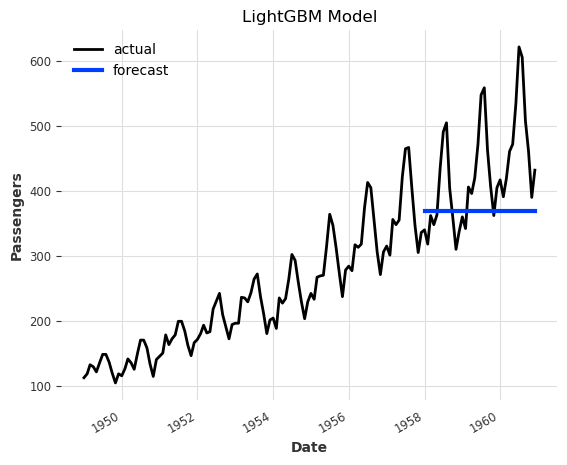

In [21]:
#Plot LightGBM Actuals Vs Forecast
series.plot(label='actual')
LGBMpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("LightGBM Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

Random Forest Model

In [22]:
#Define Random Forest Model and fit on training data
RFmodel = RandomForest(lags=12)
RFmodel.fit(train)
#Forecast
RFpreds = RFmodel.predict(len(test))
#Calculates RMSLE Score
RFrmsle = rmsle(test, RFpreds)
#Prints Score
print('Random Forest Model - RMSLE is %.6f' % (RFrmsle))

Random Forest Model - RMSLE is 0.146462


Text(0, 0.5, 'Passengers')

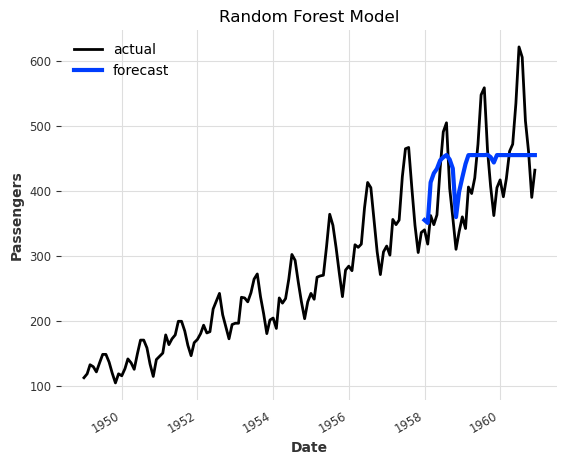

In [23]:
#Plot Rand Forest Actuals Vs Forecast
series.plot(label='actual')
RFpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("Random Forest Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

BATS MODEL

In [24]:
#Define BATS model and fit on training data
BATSmodel = BATS()
BATSmodel.fit(train)
#Forecast
BATSpreds = BATSmodel.predict(len(test))
#Calculates RMSLE score for model
BATSrmsle = rmsle(test, BATSpreds)
#Prints model
print('BATS Model - RMSLE is %.6f' % (BATSrmsle))

BATS Model - RMSLE is 0.170917


Text(0, 0.5, 'Passengers')

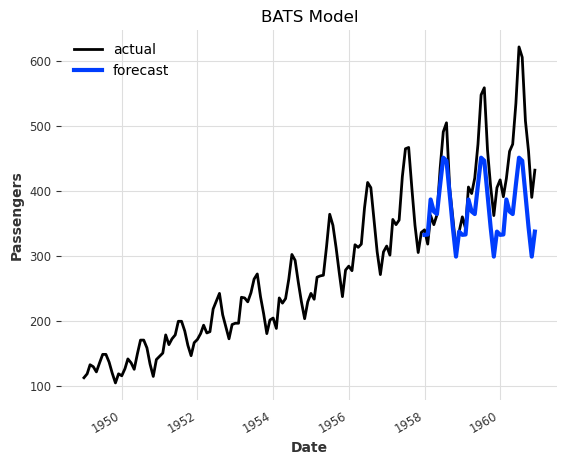

In [25]:
#Plot Rand Forest Actuals Vs Forecast
series.plot(label='actual')
BATSpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("BATS Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

THETA MODEL

In [26]:
#Define Theta model and fit on training data
Tmodel = Theta()
Tmodel.fit(train)
#Forecast
Tpreds = Tmodel.predict(len(test))
#Calculates RMSLE Score for model 
Trmsle = rmsle(test, Tpreds)
print('Theta Model - RMSLE is %.6f' % (Trmsle))

Theta Model - RMSLE is 0.105846


Text(0, 0.5, 'Passengers')

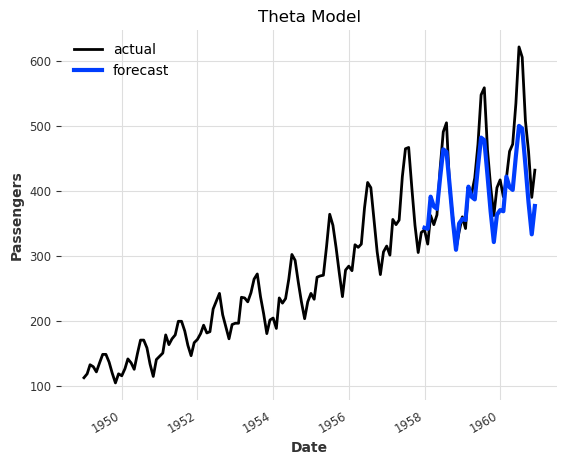

In [27]:
#Plot Rand Forest Actuals Vs Forecast
series.plot(label='actual')
Tpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("Theta Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

CATBOOST MODEL

In [28]:
#Define CatBoost Model and fit on training data
CBmodel = CatBoostModel(lags=12)
CBmodel.fit(train)
#Forecast
CBpreds = CBmodel.predict(len(test))
#Calculate RMSLE for model
CBrmsle = rmsle(test, CBpreds)
#Prints RMSLE score
print('CatBoost Model - RMSLE is %.6f' % (CBrmsle))

CatBoost Model - RMSLE is 0.145341


Text(0, 0.5, 'Passengers')

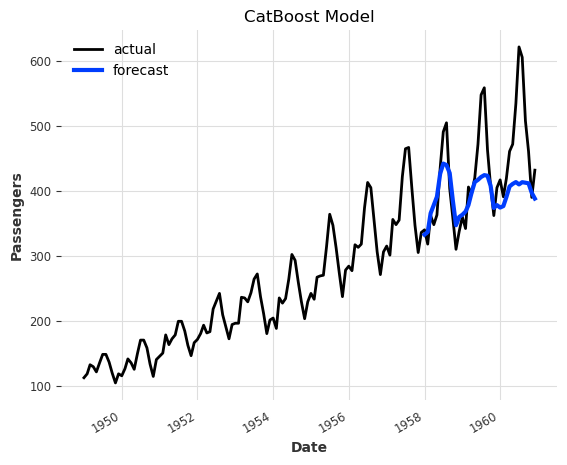

In [29]:
#Plot CATBOOST Actuals Vs Forecast
series.plot(label='actual')
CBpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("CatBoost Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

ETS MODEL

In [30]:
#Defines Naive Ensemble model and fits on training data
ETSmodel = StatsForecastETS(season_length=12, model="AZZ")
ETSmodel.fit(train)
#Forecast
ETSpreds = ETSmodel.predict(len(test))
#Calculates RMSLE score for model
ETSrmsle = rmsle(test, ETSpreds)
#Prints RMSLE score 
print('ETS Model - RMSLE is %.6f' % (ETSrmsle))

ETS Model - RMSLE is 0.074889


Text(0, 0.5, 'Passengers')

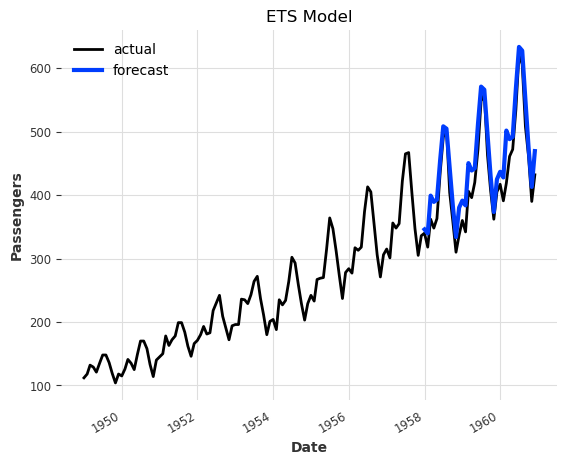

In [31]:
#Plot ETS Actuals Vs Forecast
series.plot(label='actual')
ETSpreds.plot(label='forecast', lw=3)
plt.legend()
#Title
plt.title("ETS Model")
#Label Axis
plt.xlabel('Date') 
plt.ylabel('Passengers')

EVALUATIONS

In [32]:
#   EVALUATION 
#Currently evaluates score of 12 regression models 
print('Random Forest Model - RMSLE is %.6f' % (RFrmsle))
print('XGBOOST Model       - RMSLE is %.6f' % (XGBrmsle))
print('Auto ARIMA Model    - RMSLE is %.6f' % (AArmsle))
print('ARIMA Model         - RMSLE is %.6f' % (Armsle))
print('PROPHET Model       - RMSLE is %.6f' % (Prmsle))
print('Exponential S Model - RMSLE is %.6f' % (ESrmsle))
print('BATS Model          - RMSLE is %.6f' % (BATSrmsle))
print('LGBM Model          - RMSLE is %.6f' % (LGBMrmsle))
print('Lin Reg(Trend)Model - RMSLE is %.6f' % (LINRrmsle))
print('Theta Model         - RMSLE is %.6f' % (Trmsle))
print('CatBoost Model      - RMSLE is %.6f' % (CBrmsle))
print('ETS Model           - RMSLE is %.6f' % (ETSrmsle))

Random Forest Model - RMSLE is 0.146462
XGBOOST Model       - RMSLE is 0.126250
Auto ARIMA Model    - RMSLE is 0.132712
ARIMA Model         - RMSLE is 0.107703
PROPHET Model       - RMSLE is 0.105279
Exponential S Model - RMSLE is 0.059294
BATS Model          - RMSLE is 0.170917
LGBM Model          - RMSLE is 0.219981
Lin Reg(Trend)Model - RMSLE is 0.109962
Theta Model         - RMSLE is 0.105846
CatBoost Model      - RMSLE is 0.145341
ETS Model           - RMSLE is 0.074889
